# Soal 1

**a. Download dataset produk_elektronik.csv yang ada pada link berikut**
https://bit.ly/dataprodukelektronik  

In [9]:
import pandas as pd

file_path = 'D:/Kuliah/Semester 4/Penambangan Data dan Analisis Bisnis/Tugas Data Mining/Latihan/produk_elektronik.csv'
df = pd.read_csv(file_path)

**b. Tampilkan informasi tipe data setiap kolom dan cek apakah ada missing values.**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   produk_id      550 non-null    int64  
 1   nama_produk    550 non-null    object 
 2   kategori       550 non-null    object 
 3   harga          520 non-null    float64
 4   rating         500 non-null    float64
 5   jumlah_ulasan  530 non-null    float64
 6   negara_asal    550 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 30.2+ KB


Berdasarkan hasil output tersebut didapatkan bahwa dataset tersebut memiliki 7 kolom, dengan banyak baris maksimal yaitu sebanyak 550 baris. Karena terdapat beberapa kolom yang memiliki banyak baris kurang dari 550 baris, maka perlu dilakukan *Preprocessing* data lebih lanjut.

# Soal 2

**a. Cek missing values pada dataset. Berapa jumlah missing values di setiap kolom?**

In [11]:
missing_values = df.isnull().sum()

missing_values

produk_id         0
nama_produk       0
kategori          0
harga            30
rating           50
jumlah_ulasan    20
negara_asal       0
dtype: int64

Kolom yang memiliki *Missing Value*: 
- Pada kolom "harga" terdapat 30 *Missing Value*
- Pada kolom "rating" terdapat 50 *Missing Value*
- Paada kolom "jumlah_ulasan" terdapat 20 *Missing Value*

**b.  Jelaskan bagaimana keberadaan missing values dapat memengaruhi analisis data.**

1.  Mengurangi Akurasi Model: Karena banyak algoritma machine learning tidak bisa menangani data yang tidak lengkap, sehingga hasil prediksi bisa menjadi tidak akurat.
2. Bias pada Hasil Analisis : Jika missing values tidak terdistribusi secara acak, hasil analisis bisa menjadi bias karena hanya mewakili sebagian pola dalam data.
3. Hilangnya Informasi karena Penghapusan Data:Menghapus data dengan missing values memang bisa menyelesaikan masalah, tetapi bisa menyebabkan hilangnya informasi penting dan membuat hasil analisis menjadi kurang representatif. 
4. Menyulitkan Pengambilan Keputusan: Jika data yang hilang berkaitan dengan fitur penting, seperti harga atau rating, maka pengambilan keputusan berbasis data bisa menjadi keliru.
5. Masalah pada Korelasi dan Pola: missing values bisa menyebabkan pola yang salah dalam data, misalnya memengaruhi rata-rata atau korelasi antar variabel, yang pada akhirnya bisa membuat hasil analisis menjadi menyesatkan.

**c. Tentukan metode yang paling sesuai untuk menangani missing values di setiap
kolom. Berikan alasan pemilihan metode tersebut.**

Metode: Imputasi dengan Median

Alasan: Karena data tidak perlu berdistribusi normal dan penggunaan median dinilai lebih cocok agar tidak terpengaruh outlier.


**d.  Tangani missing values dengan metode yang sesuai**

In [12]:
# Imputasi kolom 'harga' dengan median
df['harga'] = df['harga'].fillna(df['harga'].median())

# Imputasi kolom 'rating' dengan median
df['rating'] = df['rating'].fillna(df['rating'].median())

# Imputasi kolom 'jumlah_ulasan' dengan median
df['jumlah_ulasan'] = df['jumlah_ulasan'].fillna(df['jumlah_ulasan'].median())

missing_values_after = df.isnull().sum()
missing_values_after

produk_id        0
nama_produk      0
kategori         0
harga            0
rating           0
jumlah_ulasan    0
negara_asal      0
dtype: int64

Setelah melakukan Imputasi sudah tidak ada *Missing Value* di kolom tersebut. 

# Soal 3

**a. Identifikasi outlier dalam dataset**

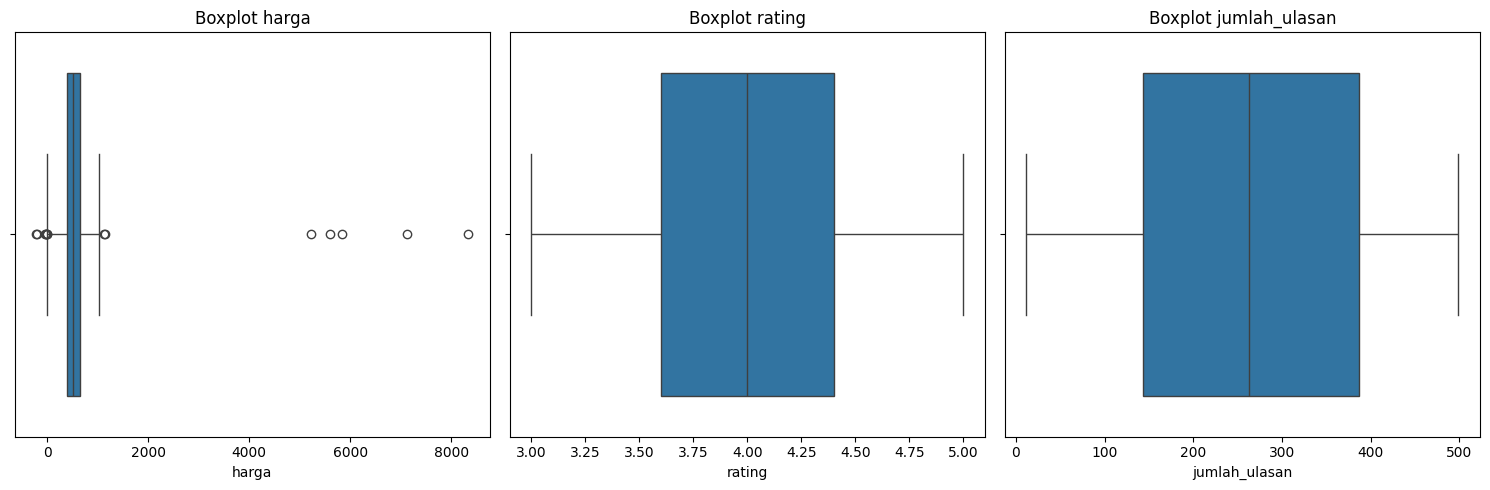

{'harga': 29     1150.0
 78      -12.0
 116    8341.0
 138    -195.0
 233    7123.0
 320    1134.0
 322     -14.0
 363    5840.0
 393    -213.0
 413    5598.0
 459     -15.0
 483    5224.0
 525     -42.0
 540     -29.0
 Name: harga, dtype: float64,
 'rating': Series([], Name: rating, dtype: float64),
 'jumlah_ulasan': Series([], Name: jumlah_ulasan, dtype: float64)}

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplot untuk mengidentifikasi outlier pada kolom numerik
numeric_cols = ['harga', 'rating', 'jumlah_ulasan']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

# Mengidentifikasi outlier menggunakan metode IQR (Interquartile Range)
outliers = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

outliers

Pada kolom "harga" terdapat 14 outliers. 

**b.  Apa dampak dari keberadaan outlier terhadap analisis?**

1. Mempengaruhi Nilai Rata-Rata dan Statistik Deskriptif
2. Menurunkan Performa Model Machine Learning
3. Menyesatkan Hubungan Antar Variabel
4. Mengganggu Proses Klasterisasi dan Klasifikasi
5. Menyulitkan Interpretasi Visual

**c. Pilih metode yang sesuai untuk menangani outlier dan jelaskan alasan pemilihannya.**

Kolom Harga

Metode: Menghapus outlier dan Mengganti dengan nilai yang wajar

Alasan:
-  Menghapus nilai negatif karena tidak logis.
- Mengganti nilai yang sangat tinggi dengan nilai maksimum dalam batas IQR untuk menjaga kestabilan distribusi.

**d.  Tangani outlier dengan metode yang sesuai, atau jika memilih tidak menangani outlier berikan alasannya.**

In [14]:
# Menangani outlier pada kolom 'harga'

# Hitung batas IQR untuk kolom 'harga'
Q1 = df['harga'].quantile(0.25)
Q3 = df['harga'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Hapus nilai negatif karena harga tidak mungkin negatif
df = df[df['harga'] >= 0]

# Batasi nilai maksimum pada batas IQR
df['harga'] = df['harga'].apply(lambda x: upper_bound if x > upper_bound else x)

# Cek ulang apakah masih ada outlier pada kolom 'harga'
outliers_harga = df[(df['harga'] < lower_bound) | (df['harga'] > upper_bound)]['harga']

outliers_harga

Series([], Name: harga, dtype: float64)

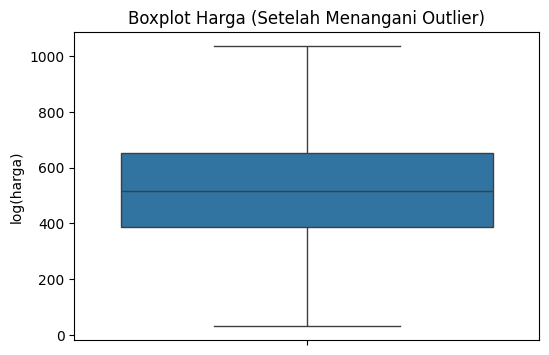

In [15]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['harga'])
plt.title("Boxplot Harga (Setelah Menangani Outlier)")
plt.ylabel("log(harga)")
plt.show()

# Soal 4

**a. Tentukan kolom mana yang memerlukan encoding.**

In [20]:
df.dtypes

produk_id          int64
nama_produk       object
kategori          object
harga            float64
rating           float64
jumlah_ulasan    float64
negara_asal       object
dtype: object

1. Kolom "Kategori" dengan tipe "object"
2. Kolom "negara_asal" dengan tipe "object"

**b. Bandingkan berbagai metode encoding dan pilih metode yang paling sesuai untuk setiap kolom. Jelaskan alasan pemilihan metode tersebut.**

1. Kolom "kategori" perlu menggunakan One-Hot Encoding (OHE), karena untuk menghindari interpretasi ordinal. 
2. Kolom "negara_asal" perlu menggunakan One-Hot Encoding (OHE), karena jumlah kategorinya terbatas. 